# Intelligent Systems | HS2025 | SW05 
## Linear regression tutorial, SW05 lecture - Solution 2 (numpy)
### Eugen Rodel, 22/10/2025

# Homework - Linear Regression: Predicting house sales price based on house size

In this homework, you will learn how to perform linear regression to predict the sale price of a house based on the size of the house. 

You are going to use the scikit-learn library, which includs many ML tools, more details here: [scikit-learn](https://scikit-learn.org/stable/)


# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set Seaborn style for plots
sns.set_style('whitegrid')


# 2. Load Data

In [2]:
# Load the uploaded data from the CSV file
data = pd.read_csv('house_prices_data_2.csv', sep=';')

# Display the first few rows of the DataFrame to understand the structure
data.head()



,House Size,House Price
0,124.9,457.8
1,240.1,790.0
2,196.4,680.3
3,169.7,626.2
4,81.2,347.9


# 3. Visualize/Expolore the data   
(we skipped cleaning the data, not necessary here, will come in later lecture)

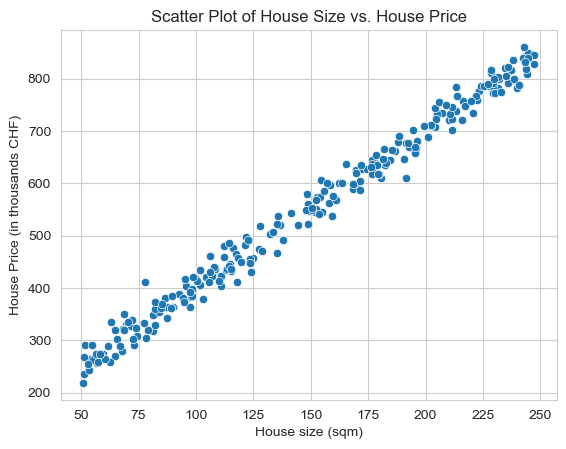

In [3]:
# Scatter plot to visualize the relationship between House Size and House Price
sns.scatterplot(x='House Size', y='House Price', data=data)
plt.xlabel('House size (sqm)')
plt.ylabel('House Price (in thousands CHF)')
plt.title('Scatter Plot of House Size vs. House Price')
plt.show()

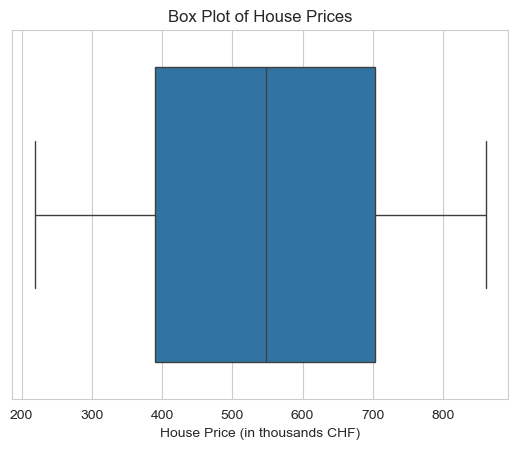

In [4]:
# Box plot to detect potential outliers in the sales data
sns.boxplot(x=data['House Price'])
plt.xlabel('House Price (in thousands CHF)')
plt.title('Box Plot of House Prices')
plt.show()

In [5]:
data['House Price'].describe()

count    250.000000
mean     545.584800
std      178.188372
min      218.700000
25%      389.800000
50%      548.300000
75%      702.875000
max      860.700000
Name: House Price, dtype: float64

# 4.  Prepare the Data for Linear Regression

In [6]:
# Separate the features/independent variables (House Size) and the target/dependent variable (House Price)
X = data[['House Size']].to_numpy()
y = data['House Price'].to_numpy()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(type(X_train))

<class 'numpy.ndarray'>


# 5. Train the Linear Regression Model

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit (or learn) the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Display the slope (coefficient) and intercept of the trained model
print(f'Coefficient (Slope): {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')


Coefficient (Slope): 2.96
Intercept: 106.10


# 6. Make Predictions and Evaluate the Model

In [10]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)


In [11]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 400.09
R-squared: 0.99


# 7. Visualize the Linear Regression Line

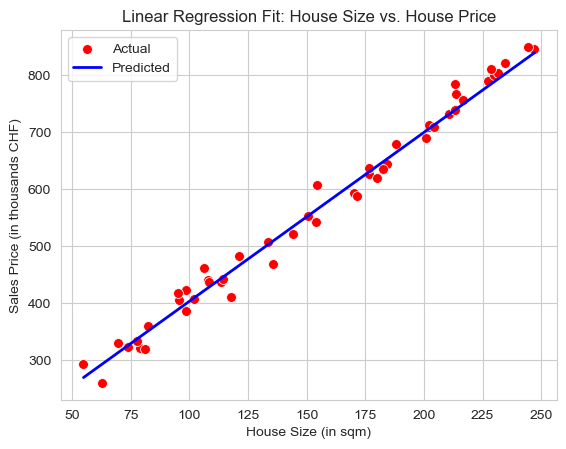

In [12]:
# Create a scatter plot for the actual data points
sns.scatterplot(x=X_test[:, 0], y=y_test, color='red', label='Actual', s=50)

# Create a line plot for the regression line (predicted values)
sns.lineplot(x=X_test[:, 0], y=y_pred, color='blue', linewidth=2, label='Predicted')

# Label the plot
plt.xlabel('House Size (in sqm)')
plt.ylabel('Sales Price (in thousands CHF)')
plt.title('Linear Regression Fit: House Size vs. House Price')
plt.legend()
plt.show()

# 8. Predict the price of a house with a size of 160 sqm

In [13]:
# House size = 160
new_house_size = np.array([[160.0]])

# Use the trained model to predict sales for the new gas station
predicted_price = model.predict(new_house_size)

# Output the prediction
print(f'Predicted price for a house with 160 sqm: {predicted_price[0]:.2f} (in thousands CHF)')


Predicted price for a house with 160 sqm: 580.42 (in thousands CHF)


# 9. Save and reuse our trained model

## Save the trained model

In [14]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'linear_regression_model_house.joblib')


['linear_regression_model_house.joblib']

## Load the saved model, and predict the price for a house with 325 sqm

In [15]:
# Load the trained model from the file
loaded_model = joblib.load('linear_regression_model_house.joblib')

# House with 325 sqm
new_house_size = np.array([[325]])

# Use the loaded model to make predictions
predicted_price = loaded_model.predict(new_house_size)

# Output the prediction
print(f'Predicted price for a house with 325 sqm: {predicted_price[0]:.2f} (in thousands CHF)')


Predicted price for a house with 325 sqm: 1069.56 (in thousands CHF)
